In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor, QuantileRegressor
import statsmodels.api as sm

In [19]:
np.random.seed(0)
n = 200

X = np.linspace(0, 10, n)
y_true = 3*X + 5
noise = np.random.normal(0, 2, n)
y = y_true + noise

In [20]:
contam_idx = np.random.choice(n, 8)
y[contam_idx] += np.random.normal(35, 5, 8)

X2 = X.reshape(-1, 1)

In [21]:
ols = LinearRegression().fit(X2, y)
huber = HuberRegressor().fit(X2, y)
quant = QuantileRegressor(quantile=0.5, alpha=0).fit(X2, y)

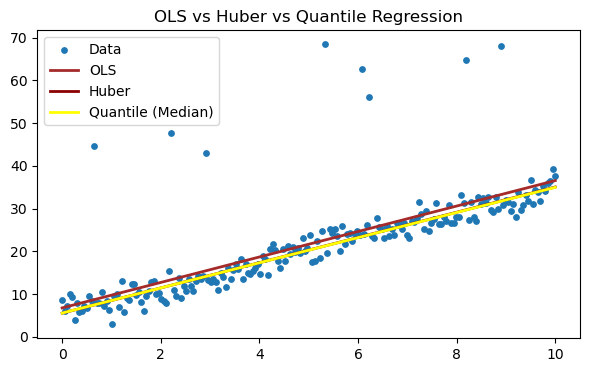

In [22]:
plt.figure(figsize=(7,4))
plt.scatter(X, y, s=15, label="Data")
plt.plot(X, ols.predict(X2), label="OLS", lw=2,color='brown')
plt.plot(X, huber.predict(X2), label="Huber", lw=2,color='darkred')
plt.plot(X, quant.predict(X2), label="Quantile (Median)", lw=2,color='yellow')
plt.title("OLS vs Huber vs Quantile Regression")
plt.legend()
plt.show()

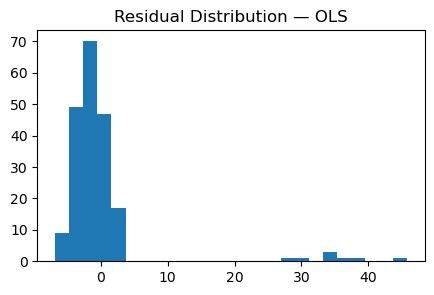

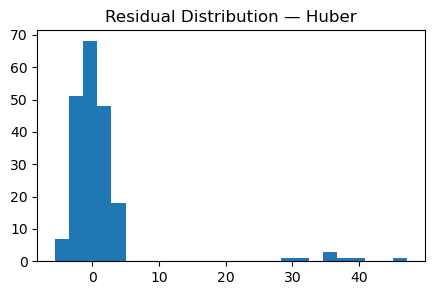

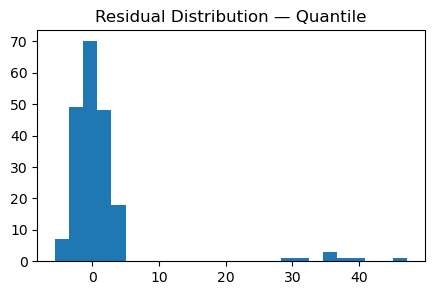

In [23]:
models = {
    "OLS": y - ols.predict(X2),
    "Huber": y - huber.predict(X2),
    "Quantile": y - quant.predict(X2)
}

for name, res in models.items():
    plt.figure(figsize=(5,3))
    plt.hist(res, bins=25)
    plt.title(f"Residual Distribution — {name}")
    plt.show()

In [24]:
X_sm = sm.add_constant(X2)
model_sm = sm.OLS(y, X_sm).fit()
influence = model_sm.get_influence()
cooks_d = influence.cooks_distance[0]

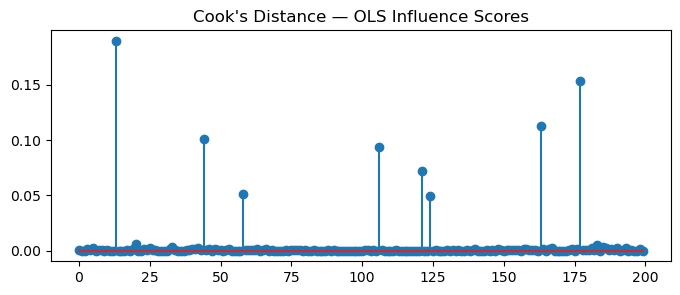

In [27]:
plt.figure(figsize=(8,3))
plt.stem(cooks_d)
plt.title("Cook's Distance — OLS Influence Scores")
plt.show()

In [28]:
top5 = np.argsort(cooks_d)[-5:]
print("Top 5 Influential Points (Cook’s Distance):")
for i in top5:
    print(i, cooks_d[i])

Top 5 Influential Points (Cook’s Distance):
106 0.09424298125286995
44 0.10134167488879676
163 0.1125216794729438
177 0.15379942666263402
13 0.18983815340883237
